<h1>Import Libraries</h1>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

<h1>Load the dataset</h1>

In [12]:
internet = pd.read_csv('dataset\\Internet-Demographic.csv')

In [13]:
internet

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


In [14]:
internet.describe().sum()

Birth rate        346.196395
Internet users    485.299059
dtype: float64

In [15]:
internet.isnull().sum()

Country Name      0
Country Code      0
Birth rate        0
Internet users    0
Income Group      0
dtype: int64

In [16]:
internet.dtypes

Country Name       object
Country Code       object
Birth rate        float64
Internet users    float64
Income Group       object
dtype: object

In [17]:
internet['Country Name'] = internet['Country Name'].astype('category')
internet['Income Group'] = internet['Income Group'].astype('category')

In [18]:
internet.dtypes

Country Name      category
Country Code        object
Birth rate         float64
Internet users     float64
Income Group      category
dtype: object

<h1>Convert categorical columns</h1>

In [19]:
internet['Income Group'] = internet['Income Group'].astype('category')

<h1>1. Histogram of Birth Rate</h1>

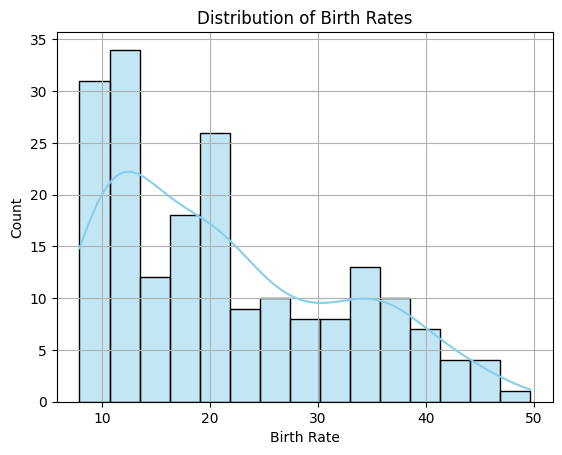

In [20]:
sns.histplot(internet['Birth rate'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Birth Rates')
plt.xlabel('Birth Rate')
plt.ylabel('Count')
plt.grid(True)
plt.show()

<h1>2. Top 5 Countries with Highest Internet Usage</h1>

In [25]:
top_5 = internet.nlargest(5, 'Internet users')[['Country Name', 'Internet users']]
print("Top 5 Countries with Highest Internet Usage:\n", top_5)

Top 5 Countries with Highest Internet Usage:
     Country Name  Internet users
84       Iceland         96.5468
22       Bermuda         95.3000
131       Norway         95.0534
163       Sweden         94.7836
47       Denmark         94.6297


<h1>3. Count of Countries by Income Group</h1>

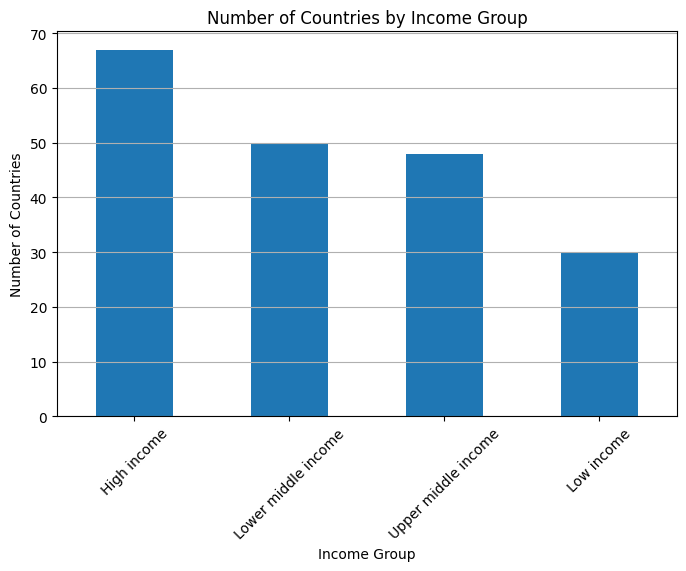

In [27]:
income_counts = internet['Income Group'].value_counts()
plt.figure(figsize=(8, 5))
income_counts.plot(kind='bar')
plt.title('Number of Countries by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<h1>4. Box Plot of Internet Users</h1>

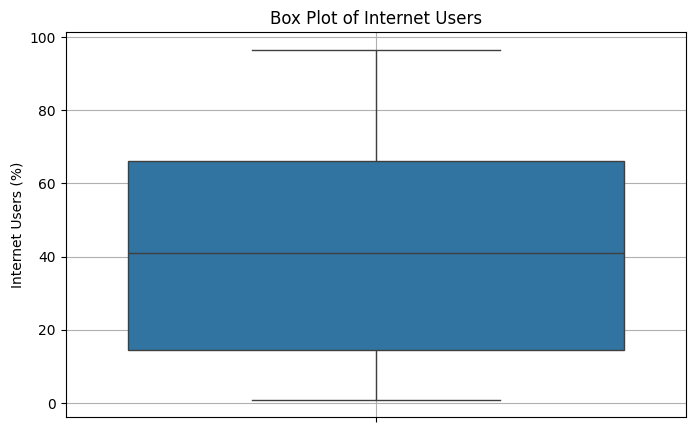

In [29]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=internet['Internet users'])
plt.title('Box Plot of Internet Users')
plt.ylabel('Internet Users (%)')
plt.grid(True)
plt.show()

<h1>5. Countries with No Internet Access</h1>

In [30]:
no_internet = internet[internet['Internet users'] == 0][['Country Name']]
print("Countries with No Internet Access:\n", no_internet)

Countries with No Internet Access:
 Empty DataFrame
Columns: [Country Name]
Index: []


<h1>6. Average Birth Rate</h1>

In [31]:
avg_birth_rate = internet['Birth rate'].mean()
print(f'Average Birth Rate: {avg_birth_rate:.2f}')

Average Birth Rate: 21.47


<h1>7. Scatter Plot: Birth Rate vs. Internet Usage</h1>

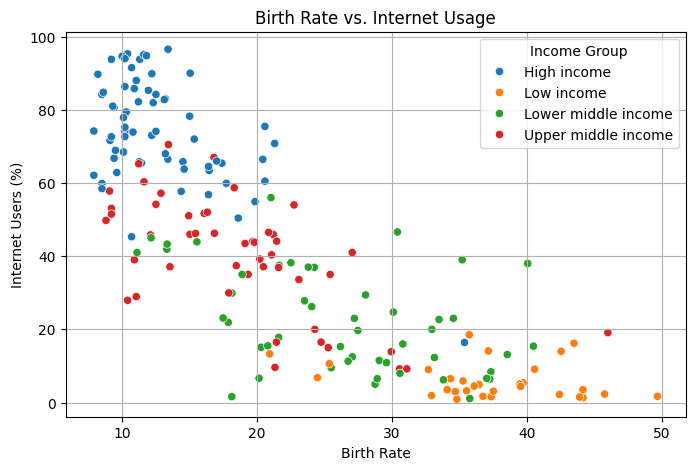

In [32]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=internet['Birth rate'], y=internet['Internet users'], hue=internet['Income Group'])
plt.title('Birth Rate vs. Internet Usage')
plt.xlabel('Birth Rate')
plt.ylabel('Internet Users (%)')
plt.grid(True)
plt.show()


<h1>8. Countries with Birth Rates Above 40</h1>

In [33]:
high_birth_rate = internet[internet['Birth rate'] > 40][['Country Name', 'Birth rate']]
print("Countries with Birth Rates Above 40:\n", high_birth_rate)

Countries with Birth Rates Above 40:
          Country Name  Birth rate
2              Angola      45.985
11            Burundi      44.151
14       Burkina Faso      40.551
65        Gambia, The      42.525
115              Mali      44.138
127             Niger      49.661
128           Nigeria      40.045
156           Somalia      43.891
167              Chad      45.745
178            Uganda      43.474
192  Congo, Dem. Rep.      42.394
193            Zambia      40.471


<h1>9. Pie Chart of Income Groups</h1>

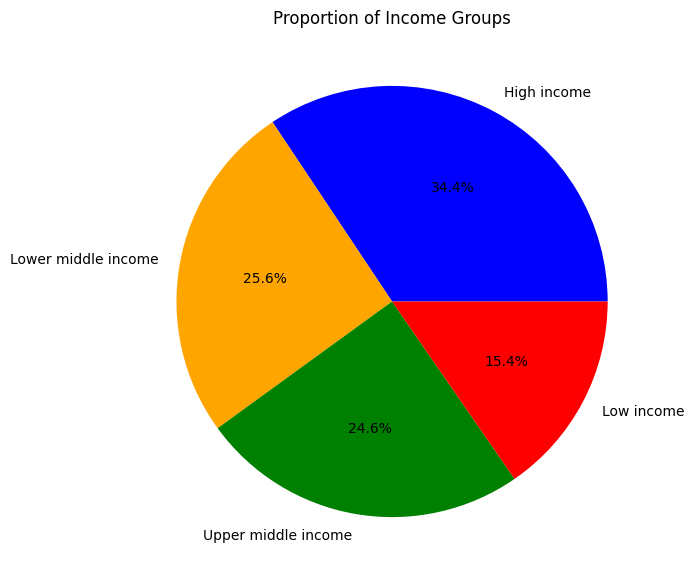

In [35]:
plt.figure(figsize=(7, 7))
income_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange', 'green', 'red'])
plt.title('Proportion of Income Groups')
plt.ylabel('')
plt.show()

<h1>10. Correlation Between Birth Rate and Internet Usage</h1>

In [36]:
correlation = internet[['Birth rate', 'Internet users']].corr()
print("Correlation Between Birth Rate and Internet Usage:\n", correlation)


Correlation Between Birth Rate and Internet Usage:
                 Birth rate  Internet users
Birth rate        1.000000       -0.815589
Internet users   -0.815589        1.000000
